Machine Learning in Python Step-by-Step

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/


In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
scipy: 1.6.2
numpy: 1.20.1
matplotlib: 3.3.4
pandas: 1.2.4
sklearn: 0.24.1


In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
# names to assign each column
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [2]:
# Step 3

# shape of dataset
print(dataset.shape)

(150, 5)


In [3]:
dataset.head(20)
# They wrapped this in a print() instead, but this way looks better in jupyter

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [5]:
# class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

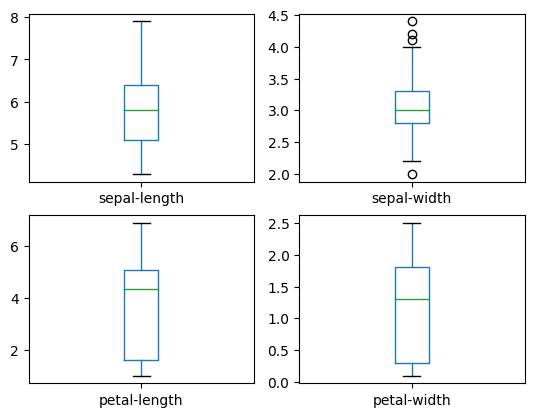

In [6]:
# Part 4
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

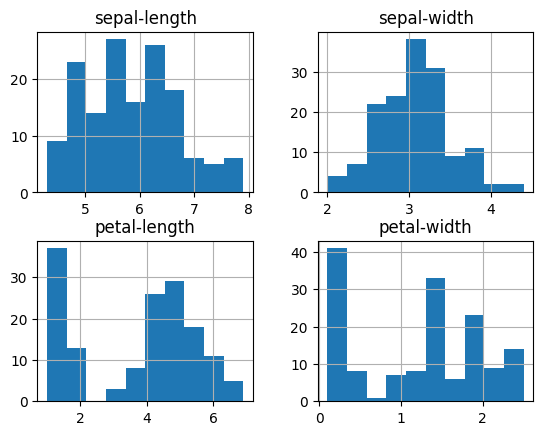

In [9]:
# histograms
dataset.hist()
pyplot.show()
# gaussian distribution

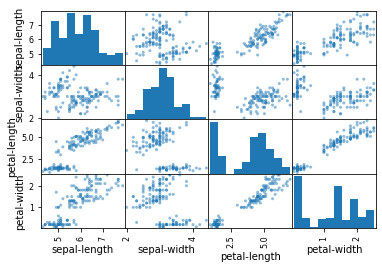

In [13]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# diagonal grouping suggests correlation between some pairs of attributes
# = high correlation and a predictable relationship

Skipping the complete example portions because with jupyter we don't have to keep initializing the variables or creating multiples of the same plots

In [10]:
# Step 5.1

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
# 80% of data used for training
# 20% of data used for validation (testing)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
# Spot Check Algorithms
models = []
# Simple linear
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
# Non-Linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [18]:
# evaluate each model in turn
results = []
names = []
print("Name\tAccuracy (Standard Deviation)")
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    # converted to f-string because its better
    print(f"{name}:\t{cv_results.mean():.6f} ({cv_results.std():.6f})")

Name	Accuracy (Standard Deviation)
LR:	0.941667 (0.065085)
LDA:	0.975000 (0.038188)
KNN:	0.958333 (0.041667)
CART:	0.941667 (0.053359)
NB:	0.950000 (0.055277)
SVM:	0.983333 (0.033333)


Testing the performance of each model, SVM has the highest accuracy at a bit over 98%

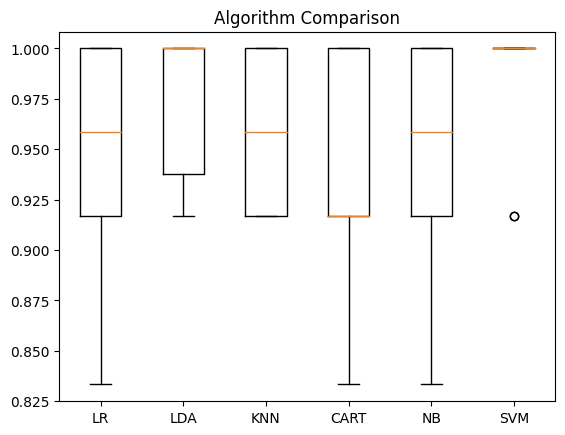

In [19]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

SVM looks weird as a box plot because so many of the results were 100% accurate with some outliers below, bringing the average down to that 98% seen earlier

In [25]:
from sklearn.svm import SVC
# using the SVM algo because it was the best performing with our dataset

# Make predictions on validation dataset
model = SVC(gamma='auto')
# X_train: features for training set
# Y_train: labels for training set
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [26]:
# Evaluate predictions
print("Accuracy Score:\n", accuracy_score(Y_validation, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(Y_validation, predictions))
print("\nClassification Report:\n", classification_report(Y_validation, predictions))
# improved readability of display

Accuracy Score:
 0.9666666666666667

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Accuracy score is self explanatory

Confusion matrix provides indication of errors

Classification report provides breakdown each class by precision, recall, f1-score and support
 - Precision: ratio of correct predicted positives to total predicted positives
 - Recall: sensitivity; ratio of correctly predicted positives to all observations
 - F1-Score: harmonic mean of precision and recall. Between 1 (perfect precision and recall) and 0
 - Support: number of actual occurrances of the class in dataset